In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

data = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
data['HDI for year'] = data['HDI for year'].fillna(0)

# Which country had most number of suicides? -> Russian Federation

In [2]:
country = data.loc[:,['country','suicides_no']]
country = country.groupby('country')['suicides_no'].sum().reset_index()
country = country.sort_values('suicides_no')
country = country.tail(10)
fig = px.pie(country, names='country', values='suicides_no', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which country had least number of suicides?-> Saint Kitts and Nevis

In [3]:
country = data.loc[:,['country','suicides_no']]
country = country.groupby('country')['suicides_no'].sum().reset_index()
country = country.sort_values('suicides_no')
country = country.head(10)
fig = px.pie(country, names='country', values='suicides_no', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Per year suicides in top 5 countries

In [4]:
perc = data.loc[:,["year","country",'suicides_no']]
perc['total_suicides'] = perc.groupby([perc.country,perc.year])['suicides_no'].transform('sum')
perc.drop('suicides_no', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc[(perc['year']>=1990.0) & (perc['year']<=2012.0)]
perc = perc.sort_values("year",ascending = False)

top_countries = ['Russian Federation','United States','Japan','France',"Ukraine"] 
perc = perc.loc[perc['country'].isin(top_countries)]
perc = perc.sort_values("year")
fig=px.bar(perc,x='country', y="total_suicides", animation_frame="year", 
           animation_group="country", color="country", hover_name="country")
fig.show()

# People of which sex commit more suicide?---> Male

In [5]:
sex = data.loc[:,['year','sex','suicides_no']]
sex['total_suicides'] = sex.groupby(['year','sex'])['suicides_no'].transform('sum')
sex.drop('suicides_no', axis=1, inplace=True)
sex = sex.drop_duplicates()
sex = sex[sex['year']>=2000.0]
sex = sex.sort_values("year")
fig=px.bar(sex,x='sex', y="total_suicides", animation_frame="year", 
           animation_group="sex", color="sex", hover_name="sex")
fig.show()

Now that's a considerable amount of difference but I think there is an ambiguity since male population may be higher, so let's consider the suicides/100k pop col rather than total count

In [6]:
sex = data.loc[:,['year','sex','suicides/100k pop']]
sex['total_suicides'] = sex.groupby(['year','sex'])['suicides/100k pop'].transform('sum')
sex.drop('suicides/100k pop', axis=1, inplace=True)
sex = sex.drop_duplicates()
sex = sex[sex['year']>=2000.0]
sex = sex.sort_values("year")
fig=px.bar(sex,x='sex', y="total_suicides", animation_frame="year", 
           animation_group="sex", color="sex", hover_name="sex")
fig.show()

So there was no ambiguity and the rate of suicides in male is much higher than females.

# Year wise change in number of suicides

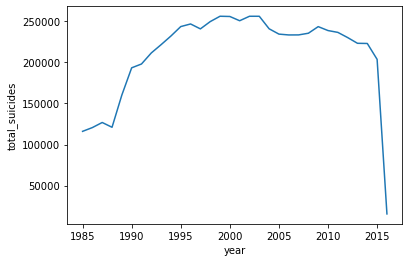

In [7]:
year = data.loc[:,['year','suicides_no']]
year['total_suicides'] = year.groupby('year')['suicides_no'].transform('sum')
year.drop('suicides_no', axis=1, inplace=True)
year = year.drop_duplicates()
sns.lineplot(data=year, x='year', y='total_suicides')

# People of which Age group commit more suicide? --> 35-54 years

In [8]:
age = data.loc[:,['year','age','suicides_no']]
age['total_suicides'] = age.groupby(['year','age'])['suicides_no'].transform('sum')
age.drop('suicides_no', axis=1, inplace=True)
age = age.drop_duplicates()
age = age[age['year']>=2000.0]
age = age.sort_values("year")
fig=px.bar(age,x='age', y="total_suicides", animation_frame="year", 
           animation_group="age", color="age", hover_name="age")
fig.show()

# Relation between number of suicides and population

Text(0.5, 1.0, 'Number of Suicides vs Population')

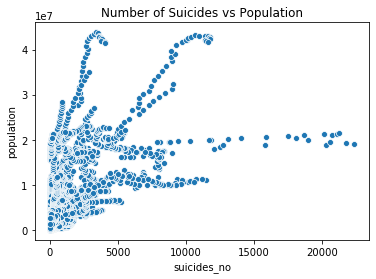

In [9]:
sns.scatterplot(data=data, x='suicides_no', y='population')
plt.title('Number of Suicides vs Population')

# Relation of total number of suicides and HDI per year for top 5 countries

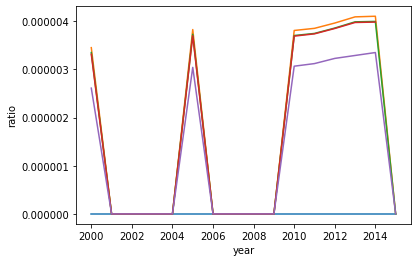

In [10]:
hdi = data.loc[:,['country','year','suicides_no','HDI for year']]
hdi['total_suicides'] = hdi.groupby('year')['suicides_no'].transform('sum')
hdi.drop('suicides_no', axis=1, inplace=True)

hdi['ratio'] = hdi['HDI for year']/hdi['total_suicides']
top_countries = ['Russian Federation','United States','Japan','France',"Ukraine"] 
hdi = hdi.loc[hdi['country'].isin(top_countries)]
hdi = hdi.drop_duplicates()
hdi = hdi[hdi['year']>=2000]
for country in top_countries:
    df = hdi[hdi['country']==country]
    sns.lineplot(data=df, x='year', y='ratio')

This isn't making any sense. But my knowledge is stuck at this pint. I am not sure which plot to use to understand this in more depth. I will update it once I find out.

# Relation of change in GDP to number of suicides

Text(0.5, 1.0, 'Total numbe of Suicides per year')

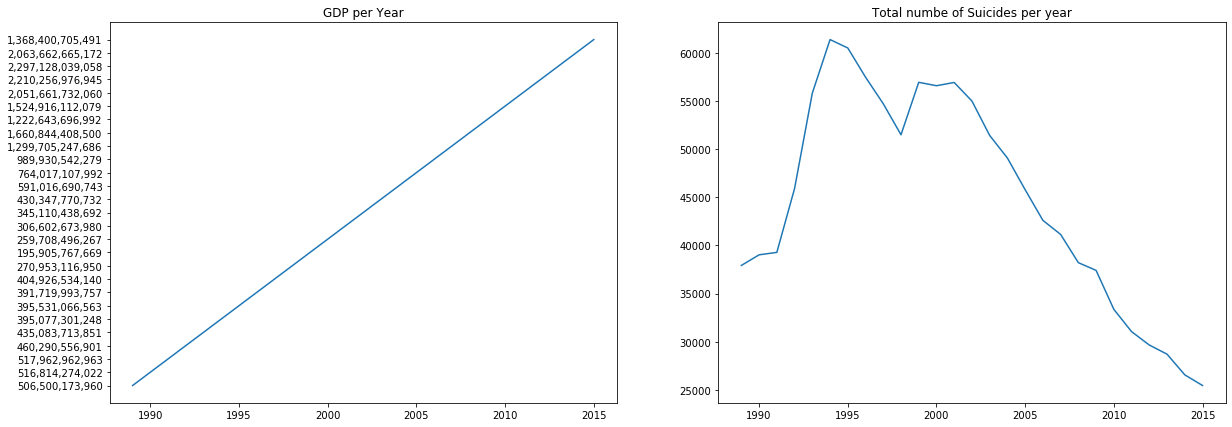

In [11]:
#lets do for russia at first
russia = data[data['country']=='Russian Federation'].copy()
gdp = russia.iloc[:,[1,4,9]].copy()
gdp['total_suicides'] = gdp.groupby('year')['suicides_no'].transform('sum')
gdp.drop('suicides_no', axis=1, inplace=True)
gdp = gdp.drop_duplicates()
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
ax.plot(gdp['year'], gdp.iloc[:,1])
ax.set_title('GDP per Year')
ax1 = fig.add_subplot(1,2,2)
ax1.plot(gdp['year'], gdp['total_suicides'])
ax1.set_title('Total numbe of Suicides per year')

# Which generation commits more suicide? --> Boomers

1. The Greatest Generation (or GI Generation) -> Born in 1924 or earlier
2. The Silent Generation -> Born 1925-1945 (Sometimes listed as 1925-1942)
3. Baby Boomers -> Born 1946-1964 (Sometimes listed as 1943-1964)
4. Generation X -> Born 1965-1980 (Sometimes listed as 1965-1979)
5. Millennials -> Born 1981-1996 (Sometimes listed as 1980-2000)
6. Generation Z or Gen Z -> Born 1997-current

In [12]:
gen = data.loc[:,['suicides_no','generation']]
gen['mean'] = gen.groupby('generation')['suicides_no'].transform('sum')
gen.drop('suicides_no', axis=1, inplace=True)
gen = gen.drop_duplicates()


fig = px.pie(gen, names='generation', values='mean', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

Now there is some ambiguity because GenZ population is not yet as much as other generations. 

So to generalise that let's take the mean values.

In [13]:
gen = data.loc[:,['suicides_no','generation']]
gen['mean'] = gen.groupby('generation')['suicides_no'].transform('mean')
gen.drop('suicides_no', axis=1, inplace=True)
gen = gen.drop_duplicates()


fig = px.pie(gen, names='generation', values='mean', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Relation between number of suicides and gdp_per_year

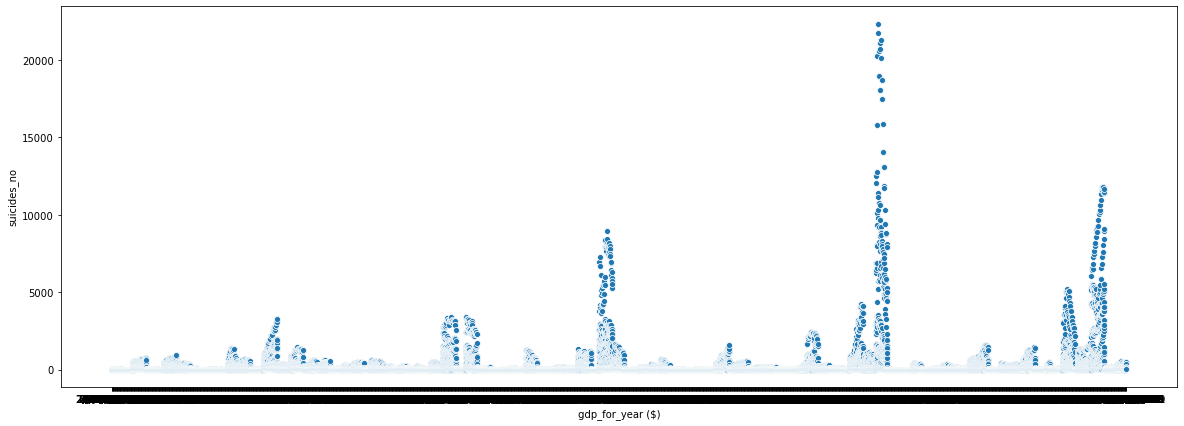

In [14]:
fig = plt.figure(figsize=(20,7))
sns.scatterplot(data=data, x=' gdp_for_year ($) ', y='suicides_no')

# Relation between number of suicides and gdp_per_capita

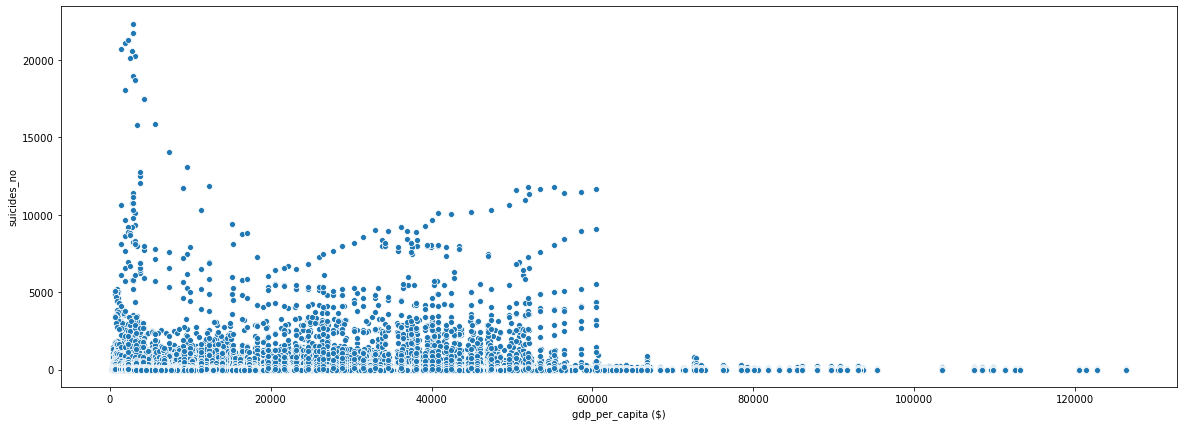

In [15]:
fig = plt.figure(figsize=(20,7))
sns.scatterplot(data=data, x='gdp_per_capita ($)', y='suicides_no')

# Relation between suicides_no and suicides/100k pop

Text(0.5, 1.0, 'Number of suicides vs for 100k population')

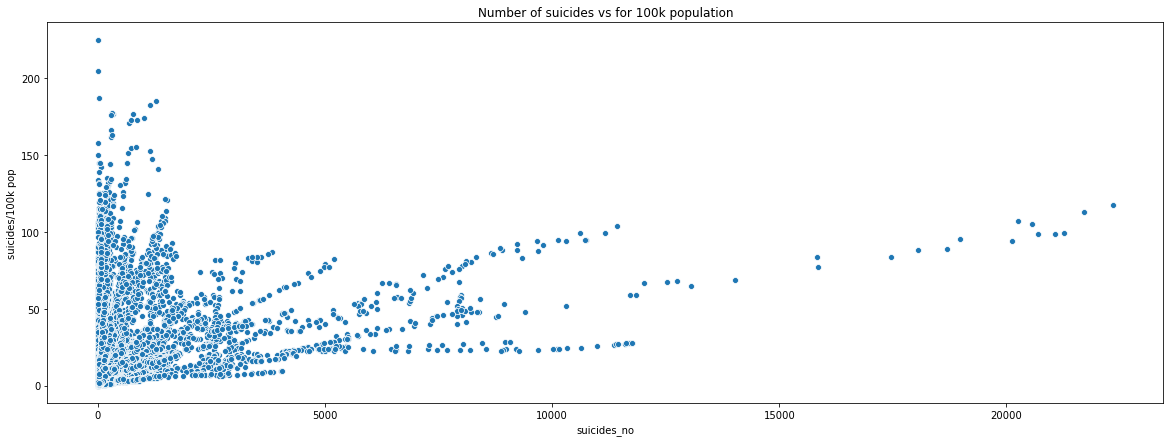

In [16]:
fig = plt.figure(figsize=(20,7))
sns.scatterplot(data=data, x='suicides_no', y='suicides/100k pop')
plt.title('Number of suicides vs for 100k population')

I will end my interview with the dataset here. Will continue if I have some new questions.